In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import awswrangler as wr

COLORS = [
    '#225669', #GREEN
    '#B30033', #RED
    '#00a382', #green
    '#222', #black
    '#fff', #white
]

S3_BUCKET_DATA = "cgarcia.cidaen.tfm.datalake"
S3_BUCKET_GOLD_CATEGORIES_PATH = "gold/categories.csv"
S3_BUCKET_GOLD_LOCATIONS_PATH = "gold/locations.csv"
S3_BUCKET_GOLD_PRODUCTS_PATH = "gold/products.csv"

# Producto

In [33]:
df = wr.s3.read_csv(f's3://{S3_BUCKET_DATA}/{S3_BUCKET_GOLD_PRODUCTS_PATH}')
df.head()

,Unnamed: 0,date,product_display_name,web_slug,price,days_since_creation
0,0,2024-07-28,BMW Serie 3 2005 (nz04wpy1o7jo),bmw-serie-3-2005-1024988375,6500.0,27
1,1,2024-07-28,KIA GTLine 774kWh 239kW AWD Long Range EV6 202...,kia-gtline-774kwh-239kw-awd-long-range-ev6-202...,49700.0,24
2,2,2024-07-28,KIA e-Niro 150kW 204CV Drive Long Range 2023 (...,kia-e-niro-150kw-204cv-drive-long-range-2023-1...,37600.0,24
3,3,2024-07-28,KIA EV9 GT Line 998kWh 283kW AWD 7pl (e658p0g9...,kia-ev9-gt-line-998kwh-283kw-awd-7pl-1025912096,76700.0,24
4,4,2024-07-28,KIA EV6 GT Line AWD (Long Range) (e658p0g8wm6o),kia-ev6-gt-line-awd-long-range-1025910072,53300.0,24


In [34]:
grouped = df.groupby('date').agg(
    product_count=('product_display_name', 'count'),
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    avg_published_days=('days_since_creation', 'median'),
)

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Product Count'),
 Text(0.5, 1.0, 'Product Count by Date')]

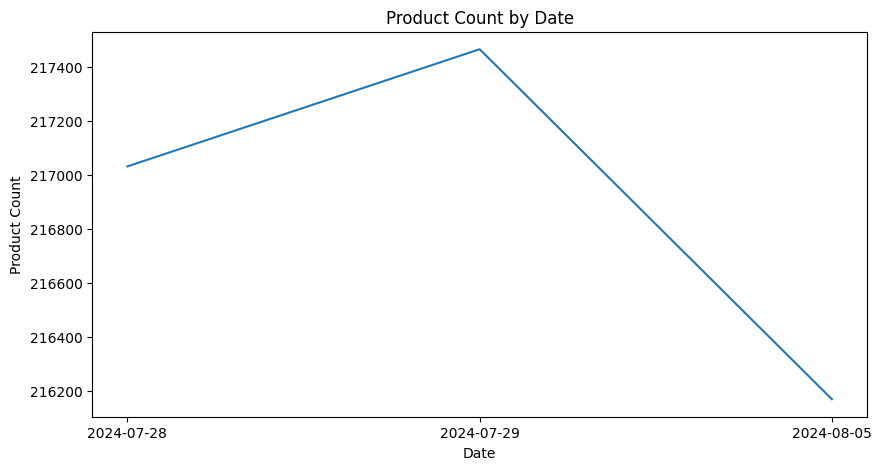

In [35]:
kpi = 'product_count'

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x="date", y=kpi, data=grouped, ax=ax)

ax.set(
    xlabel="Date",
    ylabel="Product Count",
    title="Product Count by Date",
)

# Categorias

# LOcalizaciones

In [11]:
df = wr.s3.read_csv(f's3://{S3_BUCKET_DATA}/{S3_BUCKET_GOLD_CATEGORIES_PATH}')
df.head()

,Unnamed: 0,date,category_display_name,price_mean,price_max,price_min,product_id,days_since_creation,category_parent_display_name
0,0,2024-07-28,0-6 meses (68 cm) (Niños y bebés > Ropa infant...,14.495649,130.0,1.0,439,535.141230,Niños y bebés
1,1,2024-07-28,10-12 años (150 cm) (Niños y bebés > Ropa infa...,14.202500,399.0,1.0,532,464.456767,Niños y bebés
2,2,2024-07-28,12-18 meses (86 cm) (Niños y bebés > Ropa infa...,12.212329,55.0,1.0,219,735.881279,Niños y bebés
3,3,2024-07-28,13-14 años (164 cm) (Niños y bebés > Ropa infa...,13.195333,100.0,1.0,210,396.266667,Niños y bebés
4,4,2024-07-28,18-24 meses (92 cm) (Niños y bebés > Ropa infa...,12.260347,80.0,0.0,144,649.083333,Niños y bebés


<Axes: xlabel='date', ylabel='price_max'>

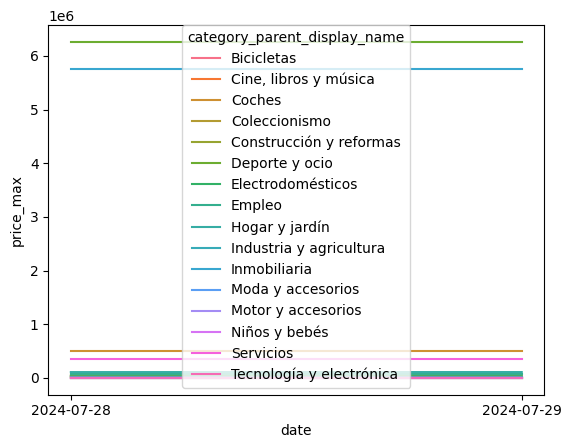

In [17]:
sns.lineplot(x="date", y="price_max",
             hue="category_parent_display_name",
             data=df.groupby(["date", "category_parent_display_name"])[['price_max']].mean().reset_index())

In [13]:
df.category_parent_display_name.nunique()

16